In [48]:
import sys
import os
# set package path
sys.path.append("/nfs/Workspace/CardiacSeg")

from monai.transforms import (
    AddChanneld,
    Compose,
    LoadImaged,
    Orientationd,
    ScaleIntensityd,
    ToNumpyd,
    SqueezeDimd
)

import matplotlib.pyplot as plt

from datasets.chgh_dataset import get_data_dicts

In [14]:
data_dicts_json = os.path.join('/nfs/Workspace/CardiacSeg', 'exps', 'data_dicts', 'chgh', 'exp_b7_9.json')
data_dir = '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2'

data_dicts = get_data_dicts(data_dir)

data_dicts

[{'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_08_1/pid_08_1.nii.gz',
  'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_08_1/pid_08_1_gt.nii.gz'},
 {'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_02/pid_02.nii.gz',
  'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_02/pid_02_gt.nii.gz'},
 {'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_05/pid_05.nii.gz',
  'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_05/pid_05_gt.nii.gz'},
 {'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_06/pid_06.nii.gz',
  'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_06/pid_06_gt.nii.gz'},
 {'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_07/pid_07.nii.gz',
  'label': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_07/pid_07_gt.nii.gz'},
 {'image': '/nfs/Workspace/CardiacSeg/dataset/chgh/dataset_2/pid_08/pid_08.nii.gz',
  'label': '/nfs/Workspace/CardiacSeg/dataset/ch

In [50]:
keys = ["image"]
transform = Compose(
  [
      LoadImaged(keys=keys),
      AddChanneld(keys=keys),
      Orientationd(keys=keys, axcodes="PLI"),
      ScaleIntensityd(keys=keys, minv=0, maxv=255),
      SqueezeDimd(keys=keys),
      ToNumpyd(keys=keys,dtype=np.uint8)
  ]
)

In [51]:
data = transform(data_dicts[0])
data['image'].shape

(512, 512, 341)

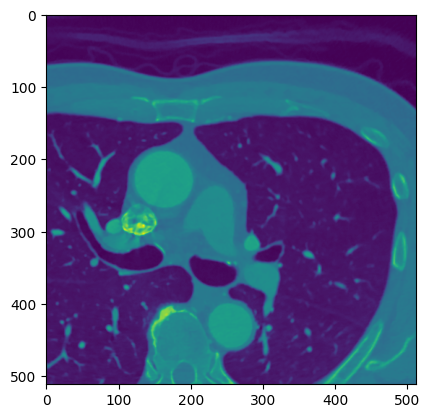

In [52]:
plt.imshow(data['image'][:,:,0])

In [35]:
!pwd

/nfs/Workspace/CardiacSeg/exps/edas


In [55]:
import cv2
import numpy as np

# choose codec according to format needed
fps = 1
size = (512, 512)
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('all_image.avi', fourcc, fps, size)

for data_dict in data_dicts:
    data = transform(data_dict)
    for i in range(data['image'].shape[-1]):
        video.write(data['image'][:,:,i])
    break

cv2.destroyAllWindows()
video.release()